# Task

**Задание**

**Цель:** изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

**Описание задания:**

В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

**Этапы работы:**

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

Сделайте выводы.

Удалите признаки на основании полученных значений, выводов.

Повторите п. 3, п. 4 на измененных данных.

Исследуйте оставленные признаки на выбросы.

Удалите выбросы в случае обнаружения.

Повторите п. 3, п. 4 на измененных данных.

Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

Повторите п. 3, п. 4 на измененных данных.

Сформулируйте выводы по проделанной работе.

Кратко опишите какие преобразования были сделаны с данными.

Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.

Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

# Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
SEED = 42

# Load data

In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

Посмотрим пропуски

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
sum(pd.isnull(y))

0

Пропущенных значений набор данных не имеет

# Modeling (base line)

Разобьем выборку на обучающую и тестовую часть и обучим модель

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
rmse_baseline_train = mean_squared_error(y_train, reg.predict(X_train), squared=False)
rmse_baseline_test = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2_baseline_train = r2_score(y_train, reg.predict(X_train))
r2_baseline_test = r2_score(y_test, reg.predict(X_test))
description = 'Используются все изначальные признаки набора данных без преобразований'
columns_name = ['RMSE_train', 'RMSE_test', 'R2_train', 'R2_test', 'Description']
df_score = pd.DataFrame(np.array([rmse_baseline_train, rmse_baseline_test, r2_baseline_train, 
                                  r2_baseline_test, description
                                  ]).reshape(1,-1),
             columns=columns_name,
             index=['Model_baseline'])
df_score.head()

,RMSE_train,RMSE_test,R2_train,R2_test,Description
Model_baseline,0.7196757085831575,0.7455813830127763,0.6125511913966952,0.575787706032451,Используются все изначальные признаки набора д...


# EDA

Проверим целевую переменную на выбросы

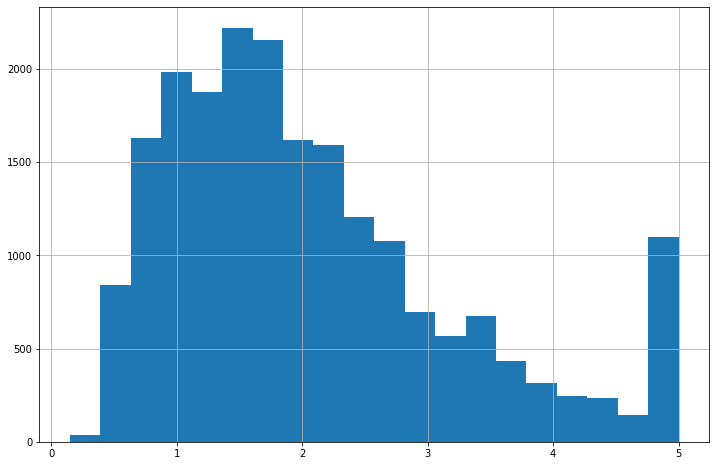

In [ ]:
y.hist(bins=20)

В целевой переменной наблюдаются выбросы на правой границе распределения

Выведем корреляционную матрицу

In [ ]:
X_y = pd.concat([X, y], axis=1)

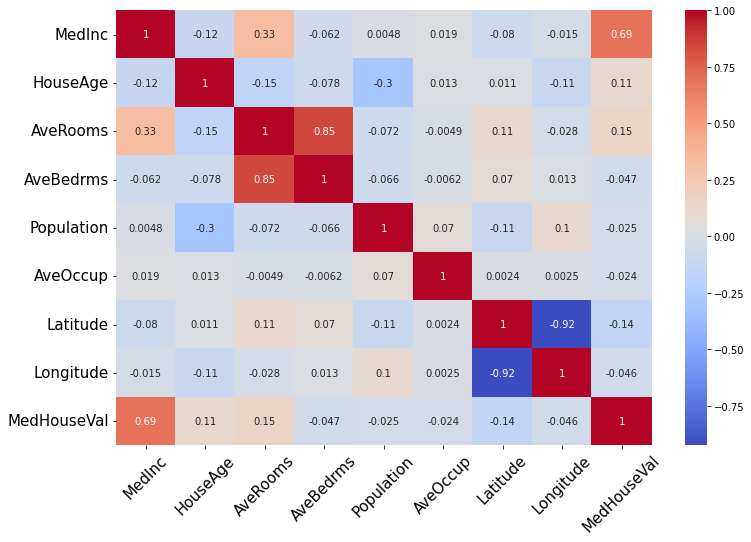

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
sns.heatmap(X_y.corr(),cmap='coolwarm', annot=True)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


Можно выделить сильную линейную связь признаков AveBedrms и AveRooms, что не удивительно. Чем больше комнат, тем ,скорее всего, больше людей там живет и больше требуется спален.

Также выделяется сильная обратная связь признаков широты и долготы, что, на мой взгляд, не может считаться значимым для нас. Два эти признака имеет смысл рассматривать как один в рамках геоданных об объекте.

Целевая переменная значимо коррелирует с признаком MedInc

# Modeling 1

Уберем из обучающего набора данных признаки AveBedrms и Longitude, чтобы избежать эффекта мультиколлениарности

In [ ]:
X = X.drop(['AveBedrms', 'Longitude'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
rmse_baseline_train = mean_squared_error(y_train, reg.predict(X_train), squared=False)
rmse_baseline_test = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2_baseline_train = r2_score(y_train, reg.predict(X_train))
r2_baseline_test = r2_score(y_test, reg.predict(X_test))
description = 'Убраны призанки AveBedrms, Longitude из набора данных. Преобразований нет'
df_model1 = pd.DataFrame(np.array([rmse_baseline_train, rmse_baseline_test, 
                                    r2_baseline_train, r2_baseline_test, description
                                    ]).reshape(1,-1),
                         columns=columns_name,
                         index=['Model_1'])
df_score = pd.concat([df_score, df_model1])
df_score.head()

,RMSE_train,RMSE_test,R2_train,R2_test,Description
Model_baseline,0.7196757085831575,0.7455813830127763,0.6125511913966952,0.575787706032451,Используются все изначальные признаки набора д...
Model_1,0.7972715471833608,0.8045916260704176,0.5244970973178325,0.5059804263462322,"Убраны призанки AveBedrms, Longitude из набора..."


Исследуем признаки на выбросы

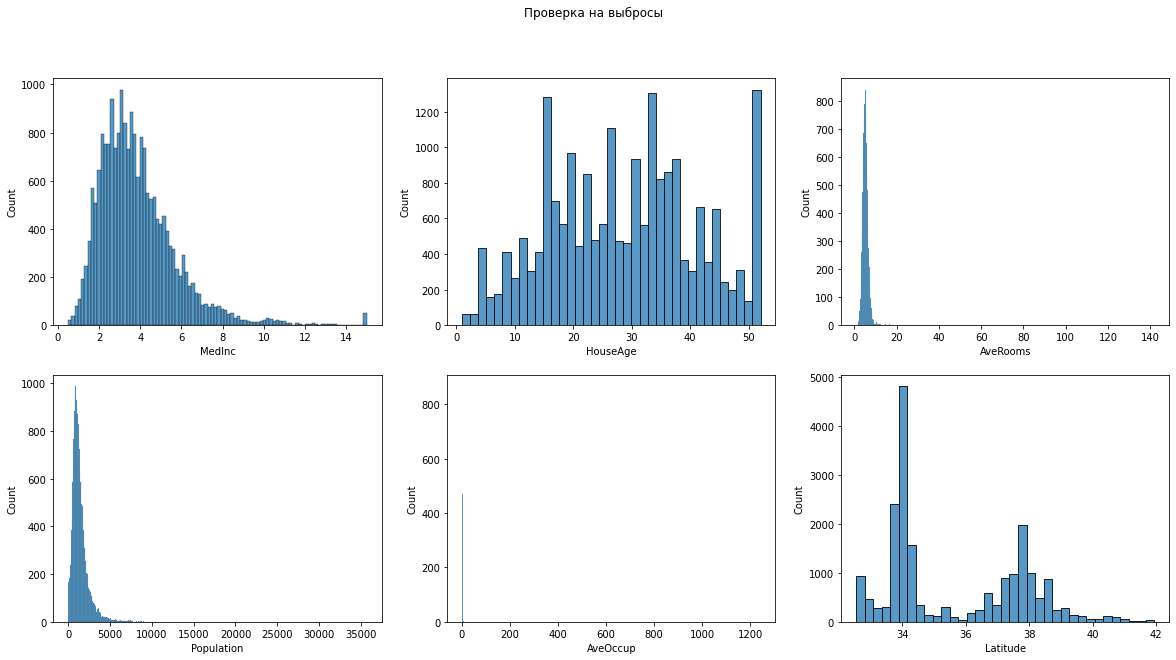

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Проверка на выбросы')

sns.histplot(ax=ax[0, 0], x="MedInc", data=X)
sns.histplot(ax=ax[0, 1], x="HouseAge", data=X)
sns.histplot(ax=ax[0, 2], x="AveRooms", data=X)
sns.histplot(ax=ax[1, 0], x="Population", data=X)
sns.histplot(ax=ax[1, 1], x="AveOccup", data=X)
sns.histplot(ax=ax[1, 2], x="Latitude", data=X)
plt.show()

Удалим объекты содержащие выбросы

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
X_y = pd.concat([X, y], axis=1)

In [ ]:
X_y = X_y[X_y['MedInc']<=np.percentile(np.array(X_y['MedInc']), q = 99)]
X_y = X_y[X_y['AveRooms']<=np.percentile(np.array(X_y['AveRooms']), q = 99)]
X_y = X_y[X_y['Population']<=np.percentile(np.array(X_y['Population']), q = 99)]
X_y = X_y[X_y['AveOccup']<=np.percentile(np.array(X_y['AveOccup']), q = 99.5)]

Посмотрим на полученные распределения признаков

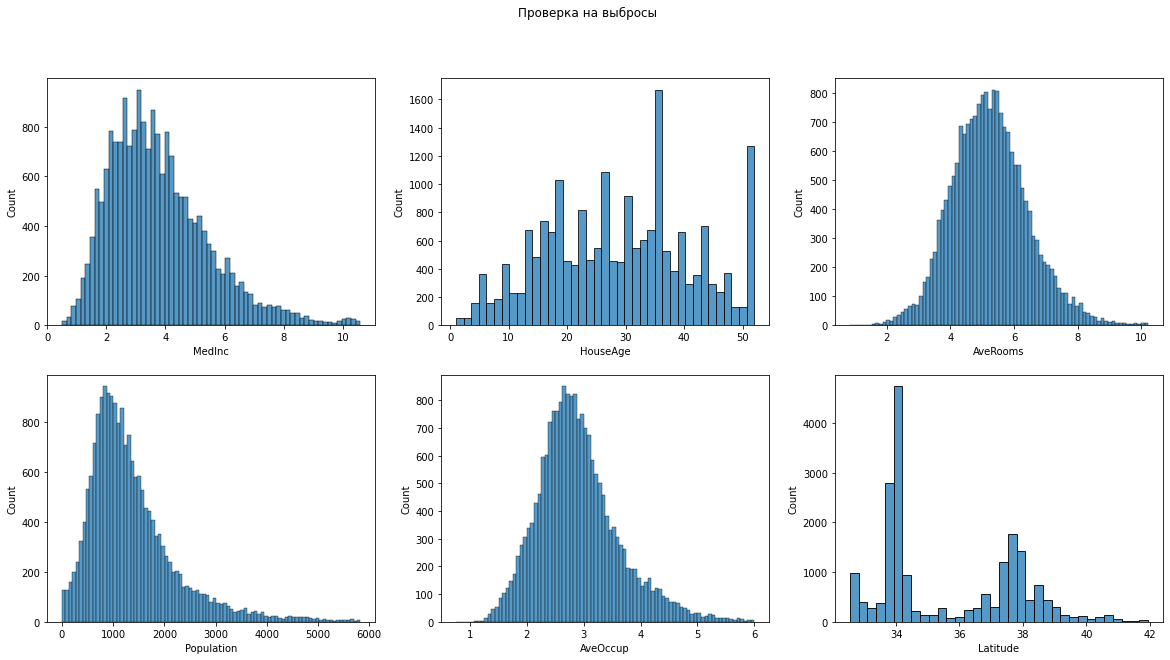

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Проверка на выбросы')

sns.histplot(ax=ax[0, 0], x="MedInc", data=X_y)
sns.histplot(ax=ax[0, 1], x="HouseAge", data=X_y)
sns.histplot(ax=ax[0, 2], x="AveRooms", data=X_y)
sns.histplot(ax=ax[1, 0], x="Population", data=X_y)
sns.histplot(ax=ax[1, 1], x="AveOccup", data=X_y)
sns.histplot(ax=ax[1, 2], x="Latitude", data=X_y)
plt.show()

# Modeling 2

In [ ]:
X = X_y.drop('MedHouseVal', axis=1)
y = X_y['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
rmse_baseline_train = mean_squared_error(y_train, reg.predict(X_train), squared=False)
rmse_baseline_test = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2_baseline_train = r2_score(y_train, reg.predict(X_train))
r2_baseline_test = r2_score(y_test, reg.predict(X_test))
description = 'Убраны призанки AveBedrms, Longitude из набора данных. Убраны выбросы. Преобразований нет'
df_model2 = pd.DataFrame(np.array([rmse_baseline_train, rmse_baseline_test, 
                                    r2_baseline_train, r2_baseline_test, description
                                    ]).reshape(1,-1),
                         columns=columns_name,
                         index=['Model_2'])
df_score = pd.concat([df_score, df_model2])
df_score.head()

,RMSE_train,RMSE_test,R2_train,R2_test,Description
Model_baseline,0.7196757085831575,0.7455813830127763,0.6125511913966952,0.575787706032451,Используются все изначальные признаки набора д...
Model_1,0.7972715471833608,0.8045916260704176,0.5244970973178325,0.5059804263462322,"Убраны призанки AveBedrms, Longitude из набора..."
Model_2,0.7144676318775081,0.7220797619336113,0.5952221912364513,0.5975256111550833,"Убраны призанки AveBedrms, Longitude из набора..."


Проведем математические преобразования с самыми значимыми при определении целевой переменной признаками (согласно матрице корреляций) - MedInc, HouseAge, AveRooms

# Modeling 3

Добавим признак MedInc возведенный в квадрат

In [ ]:
X['MedInc_squre'] = X['MedInc']**2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
rmse_baseline_train = mean_squared_error(y_train, reg.predict(X_train), squared=False)
rmse_baseline_test = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2_baseline_train = r2_score(y_train, reg.predict(X_train))
r2_baseline_test = r2_score(y_test, reg.predict(X_test))
description = 'Убраны призанки AveBedrms, Longitude из набора данных.\
 Убраны выбросы. Добавлен признак MedInc возведенный в квадрат'
df_model3 = pd.DataFrame(np.array([rmse_baseline_train, rmse_baseline_test, 
                                    r2_baseline_train, r2_baseline_test, description
                                    ]).reshape(1,-1),
                         columns=columns_name,
                         index=['Model_3'])
df_score = pd.concat([df_score, df_model3])
df_score.head()

,RMSE_train,RMSE_test,R2_train,R2_test,Description
Model_baseline,0.7196757085831575,0.7455813830127763,0.6125511913966952,0.575787706032451,Используются все изначальные признаки набора д...
Model_1,0.7972715471833608,0.8045916260704176,0.5244970973178325,0.5059804263462322,"Убраны призанки AveBedrms, Longitude из набора..."
Model_2,0.7144676318775081,0.7220797619336113,0.5952221912364513,0.5975256111550833,"Убраны призанки AveBedrms, Longitude из набора..."
Model_3,0.7131327398611104,0.7205134235635164,0.59673333007019,0.5992698155111187,"Убраны призанки AveBedrms, Longitude из набора..."


# Modeling 4

Добавим признак MedInc возведенный в куб

In [ ]:
X['MedInc_cube'] = X['MedInc']**3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
rmse_baseline_train = mean_squared_error(y_train, reg.predict(X_train), squared=False)
rmse_baseline_test = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2_baseline_train = r2_score(y_train, reg.predict(X_train))
r2_baseline_test = r2_score(y_test, reg.predict(X_test))
description = 'Убраны призанки AveBedrms, Longitude из набора данных.\
 Убраны выбросы. Добавлен признак MedInc возведенный в квадрат.\
 Добавлен признак MedInc возведенный в куб'
df_model4 = pd.DataFrame(np.array([rmse_baseline_train, rmse_baseline_test, 
                                    r2_baseline_train, r2_baseline_test, description
                                    ]).reshape(1,-1),
                         columns=columns_name,
                         index=['Model_4'])
df_score = pd.concat([df_score, df_model4])
df_score.head()

,RMSE_train,RMSE_test,R2_train,R2_test,Description
Model_baseline,0.7196757085831575,0.7455813830127763,0.6125511913966952,0.575787706032451,Используются все изначальные признаки набора д...
Model_1,0.7972715471833608,0.8045916260704176,0.5244970973178325,0.5059804263462322,"Убраны призанки AveBedrms, Longitude из набора..."
Model_2,0.7144676318775081,0.7220797619336113,0.5952221912364513,0.5975256111550833,"Убраны призанки AveBedrms, Longitude из набора..."
Model_3,0.7131327398611104,0.7205134235635164,0.59673333007019,0.5992698155111187,"Убраны призанки AveBedrms, Longitude из набора..."
Model_4,0.7099630149546993,0.7166254303799975,0.6003102339834692,0.6035829413518783,"Убраны призанки AveBedrms, Longitude из набора..."


# Modeling 5

Добавим признак MedInc возведенный в 4 степень

In [ ]:
X['MedInc_4'] = X['MedInc']**4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
rmse_baseline_train = mean_squared_error(y_train, reg.predict(X_train), squared=False)
rmse_baseline_test = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2_baseline_train = r2_score(y_train, reg.predict(X_train))
r2_baseline_test = r2_score(y_test, reg.predict(X_test))
description = 'Убраны призанки AveBedrms, Longitude из набора данных.\
 Убраны выбросы. Добавлен признак MedInc возведенный в квадрат.\
 Добавлен признак MedInc возведенный в куб.\
 Добавлен признак MedInc возведенный в 4 степень'
df_model5 = pd.DataFrame(np.array([rmse_baseline_train, rmse_baseline_test, 
                                    r2_baseline_train, r2_baseline_test, description
                                    ]).reshape(1,-1),
                         columns=columns_name,
                         index=['Model_5'])
df_score = pd.concat([df_score, df_model5])
df_score.head(20)

,RMSE_train,RMSE_test,R2_train,R2_test,Description
Model_baseline,0.7196757085831575,0.7455813830127763,0.6125511913966952,0.575787706032451,Используются все изначальные признаки набора д...
Model_1,0.7972715471833608,0.8045916260704176,0.5244970973178325,0.5059804263462322,"Убраны призанки AveBedrms, Longitude из набора..."
Model_2,0.7144676318775081,0.7220797619336113,0.5952221912364513,0.5975256111550833,"Убраны призанки AveBedrms, Longitude из набора..."
Model_3,0.7131327398611104,0.7205134235635164,0.59673333007019,0.5992698155111187,"Убраны призанки AveBedrms, Longitude из набора..."
Model_4,0.7099630149546993,0.7166254303799975,0.6003102339834692,0.6035829413518783,"Убраны призанки AveBedrms, Longitude из набора..."
Model_5,0.7098840470351407,0.7165440645635329,0.6003991425978525,0.6036729548098481,"Убраны призанки AveBedrms, Longitude из набора..."


# Modeling 6

Добавим признак 2, 3 и 4 степени для HouseAge, AveRooms

In [ ]:
X['HouseAge_2'] = X['HouseAge']**2
X['HouseAge_3'] = X['HouseAge']**3
X['HouseAge_4'] = X['HouseAge']**4
X['AveRooms_2'] = X['AveRooms']**2
X['AveRooms_3'] = X['AveRooms']**3
X['AveRooms_4'] = X['AveRooms']**4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
rmse_baseline_train = mean_squared_error(y_train, reg.predict(X_train), squared=False)
rmse_baseline_test = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2_baseline_train = r2_score(y_train, reg.predict(X_train))
r2_baseline_test = r2_score(y_test, reg.predict(X_test))
description = 'Убраны призанки AveBedrms, Longitude из набора данных.\
 Убраны выбросы. Добавлен признак MedInc возведенный в квадрат.\
 Добавлен признак MedInc возведенный в куб.\
 Добавлен признак MedInc возведенный в 4 степень\
 Добавленые иные степенные признаки'
df_model6 = pd.DataFrame(np.array([rmse_baseline_train, rmse_baseline_test, 
                                    r2_baseline_train, r2_baseline_test, description
                                    ]).reshape(1,-1),
                         columns=columns_name,
                         index=['Model_6'])
df_score = pd.concat([df_score, df_model6])
df_score.head(20)

,RMSE_train,RMSE_test,R2_train,R2_test,Description
Model_baseline,0.7196757085831575,0.7455813830127763,0.6125511913966952,0.575787706032451,Используются все изначальные признаки набора д...
Model_1,0.7972715471833608,0.8045916260704176,0.5244970973178325,0.5059804263462322,"Убраны призанки AveBedrms, Longitude из набора..."
Model_2,0.7144676318775081,0.7220797619336113,0.5952221912364513,0.5975256111550833,"Убраны призанки AveBedrms, Longitude из набора..."
Model_3,0.7131327398611104,0.7205134235635164,0.59673333007019,0.5992698155111187,"Убраны призанки AveBedrms, Longitude из набора..."
Model_4,0.7099630149546993,0.7166254303799975,0.6003102339834692,0.6035829413518783,"Убраны призанки AveBedrms, Longitude из набора..."
Model_5,0.7098840470351407,0.7165440645635329,0.6003991425978525,0.6036729548098481,"Убраны призанки AveBedrms, Longitude из набора..."
Model_6,0.695481357219743,0.7022129482162013,0.6164494902695319,0.6193677606221638,"Убраны призанки AveBedrms, Longitude из набора..."


Степенные преобразования признака для линейных моделей эффективны. Важно не переусердствовать и не переобучить модель, в том числе по этой причине остановимся на преобразовании до 4 степени

# Литература

1. https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii
